

# Opportunities for Microsoft in the Movie Production Industry 

__Presenters: Quentin Grigsby & Mark Thai__

__Questions to answer:__

1. Movie production industry landscape
   - Which are some of the major studios ? Gross bookings per each player ?
   - How concentrated is the industry ? 
   
   
2. What kinds of movies Microsoft should produce ?
   - What genres have been doing well in terms of popularity over the last 5 years?
   - What genres have been doing well in terms of ratings over the last 5 years?  
   - Any correlation between runtime and ratings of movies ? 



In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
#import mysql.connector



In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
#import pandas & matplotlib & numpy

In [10]:
#Read the CSV file
df = pd.read_csv('data/movie_studios.csv')

In [12]:
#Sum domestic and foreign gross bookings together and create a new column in the dataframe
df['Total_Gross'] = df['domestic_gross'] + df['foreign_gross']

We want to build a function where it will take 3 parameters: a dataframe (df), a year (year), and number of values (n), to see which are the top movie studios in a given year and their total gross bookings in that year. We would like to see how concentrated the industry by calculating % of total gross bookings coming from the top 5, 10 movie studios in a given year.  


In [15]:
#Group by Studios and then sort those values from top to bottom to see the total gross bookings since 2013
df.groupby(['studio']).sum().sort_values(by = 'Total_Gross', ascending=False)

,domestic_gross,foreign_gross,year,Total_Gross
studio,,,,
BV,14126499999,19146311001,12093,33272811000
Fox,7947399998,14899933000,12093,22847332998
Uni.,9624493000,12741371003,12093,22365864003
WB,7878404000,12733494999,12093,20611898999
Sony,5115383099,9012235998,12093,14127619097
...,...,...,...,...
FOR,10200,0,2015,10200
KS,5900,0,2014,5900
TAFC,4600,0,2015,4600


In [16]:
#This function will take 3 parameters: df, year (from 2013-2018), and number of top studios. If you want to see 
#aggregate value for all years, input 0 for the 'year' parameter  

def top(df, year, n):
    if year > 0:
        new_df = df.loc[df['year'] == year].sort_values(by = 'Total_Gross', ascending=False)
    else: new_df = df.groupby(['studio'], as_index=False).sum().sort_values(by = 'Total_Gross', ascending=False).drop(columns=['year'])
    return new_df.head(n)


----------------------------------------------------------------------------------------------------------------------




__Largest players since 2013 are Buena Vista , Universal, and Warner Bros__


Text(0, 0.5, '$ Billions')

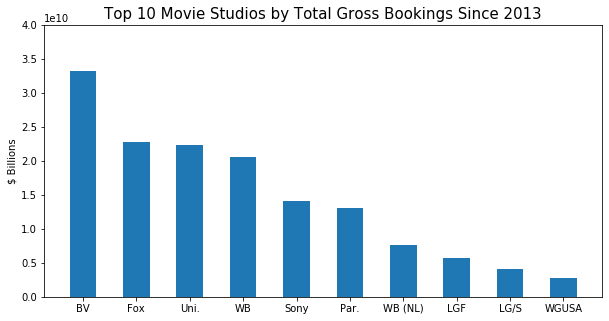

<Figure size 720x360 with 0 Axes>

In [17]:
#Aggregate total gross bookings 
total_gross_studios = top(df,0,10)

x_bar_1 = total_gross_studios.studio
y_bar_1 = total_gross_studios.Total_Gross

fig, ax = plt.subplots(figsize=(10,5))
plt.figure(figsize=(10,5))
ax.set_ylim([0,40000000000])
width = 0.5
ax.bar(x_bar_1, y_bar_1, width)
ax.set_title("Top 10 Movie Studios by Total Gross Bookings Since 2013", fontsize=15)
ax.set_ylabel('$ Billions')



-----------------------------------------------------------------------------------------------------------------------



__The industry is concentrated among top 10 players. Top 10 players generates nearly 90% of total gross bookings__



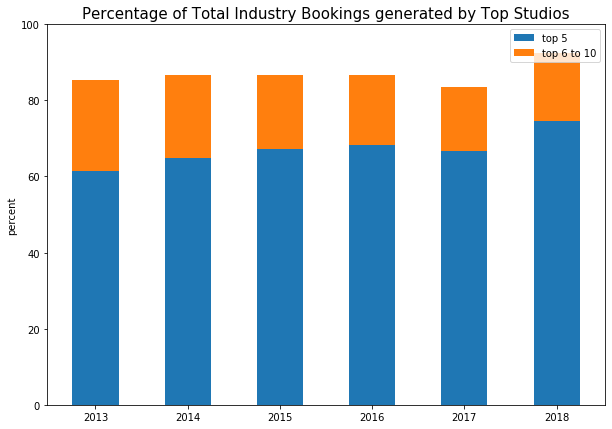

<Figure size 720x360 with 0 Axes>

In [18]:
list_of_year = [2013,2014,2015,2016,2017,2018]
percentage_5 = []
percentage_10 = [] 
for i in list_of_year:
    percentage_5.append(top(df,i,5).Total_Gross.sum() / top(df,i,1000).Total_Gross.sum() *100)
for i in list_of_year:
    percentage_10.append(top(df,i,10).Total_Gross.sum() / top(df,i,1000).Total_Gross.sum() *100 
                         - top(df,i,5).Total_Gross.sum() / top(df,i,1000).Total_Gross.sum() *100)
    
#Chart 

x_bar_2 = list_of_year
y_bar_2_1 = percentage_5 
y_bar_2_2 = percentage_10
width = 0.5

fig, ax = plt.subplots(figsize=(10,7))
plt.figure(figsize=(10,5))

ax.bar(x_bar_2, y_bar_2_1, width, label = 'top 5')
ax.bar(x_bar_2, y_bar_2_2, width, bottom=y_bar_2_1, label = 'top 6 to 10')
ax.set_ylim([0,100])
ax.set_ylabel("percent")
ax.set_title("Percentage of Total Industry Bookings generated by Top Studios", fontsize=15)
ax.legend(bbox_to_anchor=(1, 1), loc=1)
plt.show()


-------------------------------------------------------------------------------------------------------------------------------




__MSFT needs to achieve around 500M annually minimum in gross bookings to become top 10 players (based on 2018 data)__

(some data in 2018 missing)



Text(0, 0.5, '$ Billions')

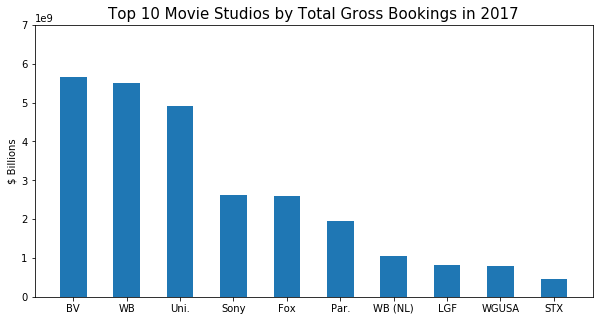

In [19]:
#Example: Gross bookings for top 10 studios in 2018
gross_studios_2018 = top(df,2018,10)

x_bar_2 = gross_studios_2018.studio
y_bar_2 = gross_studios_2018.Total_Gross

fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim([0,7000000000])
width = 0.5
ax.bar(x_bar_2, y_bar_2, width)
ax.set_title("Top 10 Movie Studios by Total Gross Bookings in 2017", fontsize=15)
ax.set_ylabel('$ Billions')


-------------------------------------------------------------------------------------------------------------------------------




__What kinds of movies Microsoft should produce ?__




In [20]:
movies = """ SELECT * FROM movies.imdb_title_basics
JOIN imdb_title_ratings on imdb_title_basics.tconst = imdb_title_ratings.tconst
where start_year > 2010
order by numvotes desc """

In [21]:
import mysql.connector
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
#import mysql.connector

In [23]:
#Rank movies based on popularity (number of votes on IMDB)
movie_df = pd.read_sql_query(movies, con)
movie_df.sort_values(by = 'numvotes', ascending = False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
1,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
2,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
3,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
...,...,...,...,...,...,...,...,...,...
65445,tt3148362,Parallelnye miry,Parallelnye miry,2013,85.0,"Drama,Romance",tt3148362,5.0,5
65446,tt3149112,Brazilian Craftswoman,Brazilian Craftswoman,2013,NaN,Documentary,tt3149112,6.4,5
65447,tt3154314,Fragmentos de Paixão,Fragmentos de Paixão,2013,70.0,"Documentary,History",tt3154314,3.8,5
65448,tt3157604,Capgras,Capgras,2017,116.0,"Drama,Mystery,Thriller",tt3157604,5.2,5


In [33]:
histogram_numvotes = movie_df.numvotes


__Dataframe for top 10% movies based on number of votes on IMDB__




In [24]:
#top 10% of movies based on number of votes. Assumption is that higher number of votes correlates with high gross bookings. 
top_movies = movie_df.head(6706)
top_movies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
1,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
2,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
3,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
...,...,...,...,...,...,...,...,...,...
6701,tt1302019,Not Another Not Another Movie,Not Another Not Another Movie,2011,99.0,Comedy,tt1302019,2.7,1572
6702,tt1770672,Djinn,Djinn,2013,82.0,"Horror,Thriller",tt1770672,4.5,1571
6703,tt2063782,Laddaland,Ladda Land,2011,113.0,"Drama,Horror",tt2063782,6.4,1571
6704,tt2877104,Ethir Neechal,Ethir Neechal,2013,129.0,"Comedy,Romance,Sport",tt2877104,6.8,1570


In [55]:
from collections import Counter
counts = Counter(top_movies.genres.str.cat(sep=',').split(','))

In [56]:
#Count each time a genre apprearing in the dataframe then sum and rank them together from top to bottom
final_df = pd.DataFrame.from_dict(counts, orient='index').sort_values(by = 0, ascending = False)
final_df['Genre'] = final_df.index.values
final_df['Count'] = final_df[0]
final_df = final_df.reset_index().drop(columns=['index',0])
final_df

,Genre,Count
0,Drama,3583
1,Comedy,2068
2,Action,1511
3,Thriller,1301
4,Crime,965
5,Horror,930
6,Romance,918
7,Adventure,791
8,Mystery,546
9,Biography,531



__Top 5 popular genres are Drama, Comedy, Action, Thriller, and Crime (based on top 10% of movies ranked by number of votes on IMDB)__

(If a movie includes multiple genres, count each of those separately and then sum all together)



Text(0.5, 0, 'Genre')

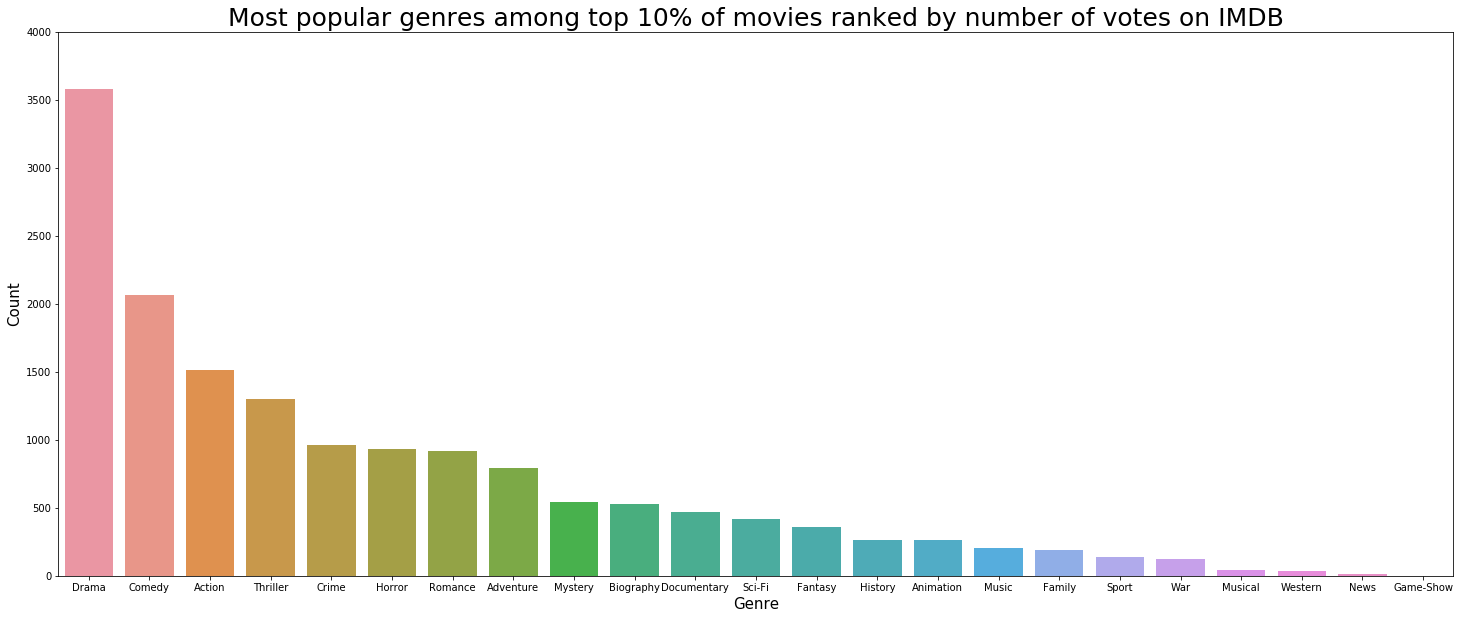

In [57]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(final_df.Genre,final_df.Count)
ax.set_ylim([0,4000])
ax.set_title("Most popular genres among top 10% of movies ranked by number of votes on IMDB", fontsize=25)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Genre', fontsize=15)


__But how about a highly rated movie?__ 



In [58]:
movie_df.averagerating.quantile([0.25,0.5,0.75])

0.25    5.5
0.50    6.5
0.75    7.4
Name: averagerating, dtype: float64

In [59]:
histogram_averagerating = movie_df.averagerating

Text(0.5, 0, 'rating')

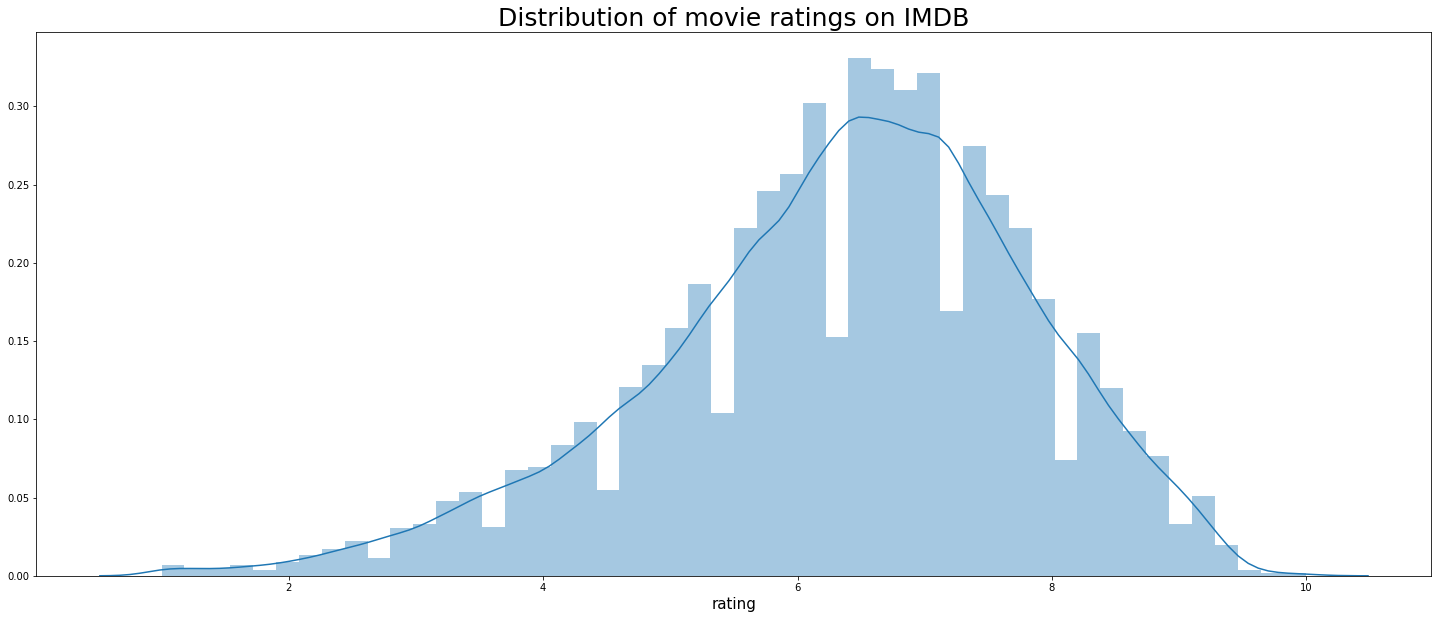

In [60]:
#distribution of movie ratings 
fig, ax = plt.subplots(figsize=(25,10))
sns.distplot(histogram_averagerating)
ax.set_title("Distribution of movie ratings on IMDB", fontsize=25)
ax.set_xlabel('rating', fontsize=15)

In [70]:
movie_df.averagerating.quantile([0.25,0.5,0.75])

0.25    5.5
0.50    6.5
0.75    7.4
Name: averagerating, dtype: float64

In [50]:
#top quartile of movies based on ratings
great_movie = top_movies.sort_values(by = 'averagerating', ascending = False).head(1676)

In [51]:
from collections import Counter
counts_1 = Counter(great_movie.genres.str.cat(sep=',').split(','))

great_movie_df = pd.DataFrame.from_dict(counts_1, orient='index').sort_values(by = 0, ascending = False)
great_movie_df['Genre'] = great_movie_df.index.values
great_movie_df['Count'] = great_movie_df[0]
great_movie_df = great_movie_df.reset_index().drop(columns=['index',0])




__Drama, Comedy, and Documentary genres generate highest ratings among top 10% popular movies ranked by number of votes on IMDB__ 



Text(0.5, 0, 'Genre')

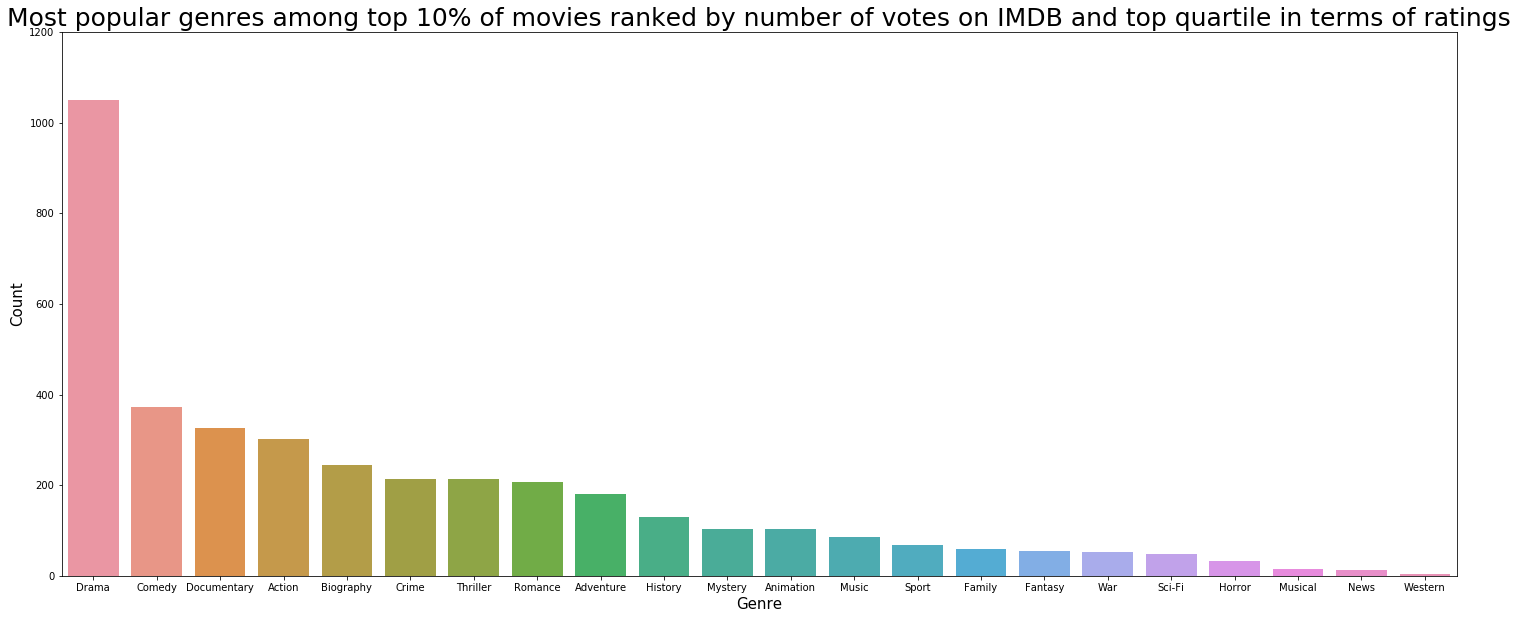

In [52]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(great_movie_df.Genre,great_movie_df.Count)
ax.set_ylim([0,1200])
ax.set_title("Most popular genres among top 10% of movies ranked by number of votes on IMDB and top quartile in terms of ratings", fontsize=25)
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Genre', fontsize=15)


____There is  positive correlation correlation between runtime and ratings of movies among the top 10% most popular movies__




In [53]:
great_movie.runtime_minutes.mean()

117.12887828162292

In [302]:
great_movie.runtime_minutes.std()

26.418177395313453

In [26]:
#break the list into 10 bins based on runtime
top_movies['Decile_rank']=pd.qcut(top_movies['runtime_minutes'],10,labels=False)

C:\Users\binht\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
#average ratings of movies based on those 10 bins & create min/max range of those bins 
run_time_ratings_numvotes = top_movies.groupby(['Decile_rank']).agg({'averagerating' : 'mean', 'runtime_minutes':['min','max']})

In [28]:
#create a dataframe
run_time_ratings_numvotes = run_time_ratings_numvotes.reset_index(drop=True)
run_time_ratings_numvotes

averagerating runtime_minutes       
           mean             min    max
0      5.776676            45.0   86.0
1      5.700865            87.0   90.0
2      5.881983            91.0   94.0
3      6.176528            95.0   98.0
4      6.262645            99.0  102.0
5      6.427952           103.0  107.0
6      6.474411           108.0  113.0
7      6.635703           114.0  121.0
8      6.873383           122.0  135.0
9      6.891679           136.0  467.0

In [29]:
#create a new column called "Range"
run_time_ratings_numvotes['Range'] = run_time_ratings_numvotes.iloc[:,1].astype(int).astype(str) + '-' + run_time_ratings_numvotes.iloc[:,2].astype(int).astype(str)

In [30]:
run_time_ratings_numvotes_x = run_time_ratings_numvotes.iloc[:,3]
run_time_ratings_numvotes_y = run_time_ratings_numvotes.iloc[:,0]

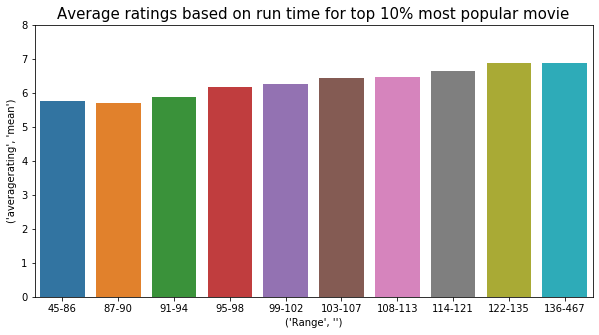

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim([0,8])
width = 0.5
ax.set_title("Average ratings based on run time for top 10% most popular movie", fontsize = 15)
ax.set_ylabel('average ratings')
ax.set_xlabel('range')
sns.barplot(run_time_ratings_numvotes_x,run_time_ratings_numvotes_y)

In [ ]:
import pandas as pd
import numpy as np
import mysql.connector

#connecting directly to the data warehouse where the information is stored
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [ ]:
import pandas as pd
import numpy as np
import mysql.connector

#connecting directly to the data warehouse where the information is stored
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [ ]:
#this action pulls data on the movie budget / revenue outcomes by film title
movie_budget = """SELECT id, release_date, movie, production_budget, domestic_gross, worldwide_gross 
FROM tn_movie_budgets ORDER BY worldwide_gross DESC; """
df = pd.read_sql_query(movie_budget, con)

In [ ]:
# cleaning production budget into integers
df['production_budget'] = df['production_budget'].astype(str)
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].astype(float)

In [ ]:
# cleaning domestic gross into integers
df['domestic_gross'] = df['domestic_gross'].astype(str)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].astype(float)

In [ ]:
# cleaning worldwide gross into integers
df['worldwide_gross'] = df['worldwide_gross'].astype(str)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].astype(float)

In [ ]:
#create a new column that calculates MOIC
#MOIC - is a proxy value. worldwide gross does not reflect studio level cash flows
#sort by MOIC

df['MOIC'] = df['worldwide_gross'] / df['production_budget']

In [ ]:
#convert date formats
pd.to_datetime(df['release_date']).head(1)

In [ ]:
#save changes to date formats.
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
#create additional date variables
df['release_month'] = df['release_date'].apply(lambda x: x.month)
df['release_day'] = df['release_date'].apply(lambda x: x.weekday())
df['release_year'] = df['release_date'].apply(lambda x: x.year)

In [ ]:
# Grab monthly movie count per month
month_counts = df.release_month.value_counts().append(
    pd.Series(df.shape[0], index=['Total']))

# Turns counts into a df and adds a column title
month_df = month_counts.to_frame()
month_df.columns = ['count']
month_df.index.name = 'release_month'

In [ ]:
#drop total from dataframe
month_counts_bar = month_df.drop(index="Total", axis=0)

In [ ]:
# Run this cell without changes

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#this action pulls data on the crew (actors/actresses, directors and writers) by movie title
title_crew = """SELECT tconst, directors, writers FROM imdb_title_crew; """
df_crew = pd.read_sql_query(title_crew, con)

In [ ]:
#this action pulls data on names of the crew members by a reference id#
name_basics = """SELECT nconst, primary_name, birth_year, death_year, primary_profession, known_for_titles FROM imdb_name_basics; """
df_names = pd.read_sql_query(name_basics, con)

In [ ]:
#merge data on crew by title / names tied to reference id#
director_df = pd.merge(df_crew,
                       df_names, 
                       left_on = ['directors'],
                       right_on = ['nconst'],)

In [ ]:
#pull data that identifies movie title by film id#
title_basics = """SELECT tconst, primary_title, original_title, start_year, genres FROM imdb_title_basics; """
df_title = pd.read_sql_query(title_basics, con)

In [ ]:
#merge dataframe of director information and dataframe of movie titles using tconst as key
df_director_plus = pd.merge(director_df,
                       df_title, 
                       left_on = ['tconst'],
                       right_on = ['tconst'],)

In [ ]:
df_budget_director = pd.merge(df,
                       df_director_plus, 
                       left_on = ['movie'],
                       right_on = ['original_title'],)

In [ ]:
df_MOIC_sort = df_budget_director.sort_values(by=['MOIC'], ascending = False)

In [ ]:
df_date_sort = df_budget_director.sort_values(by=['release_date'], ascending = True)

In [ ]:
#converts data type from non-null object to datetime
pd.to_datetime(df_date_sort['release_date']).head()

In [ ]:
#actually apply and save our changes
df_date_sort['release_date'] = pd.to_datetime(df_date_sort['release_date'])

In [ ]:
df_release_date_index = df_date_sort.set_index(['release_date'])

In [ ]:
df_release_date_index = df_date_sort.sort_values(by=['release_date'], ascending = False)

In [ ]:
df_release_date_index.sort_values(by='MOIC', ascending=False)

In [ ]:
df_sort_MOIC_2 = df_release_date_index.sort_values(by='MOIC', ascending = False)

In [ ]:
#filter for movies made after Jan 1 2013
netflix_era = '2013-01-01'
mask = (df_sort_MOIC_2['release_date'] > netflix_era)
df_1 = df_sort_MOIC_2.loc[mask]

In [ ]:
#plot figure to show top 10 directors by MOIC since 2013
director_counts = df_1['primary_name'].value_counts()
director_list = director_counts[director_counts>2].index.tolist()
df_2 = df_1[df_1['primary_name'].isin(director_list)]

In [ ]:
director_moic = df_2.groupby(by='primary_name').mean()['MOIC']

In [ ]:
director_valuecounts = df_2.primary_name.value_counts()

In [ ]:
director_df = pd.merge(director_valuecounts, director_moic, left_index=True, right_index=True)
director_df = director_df.rename(columns={'primary_name':'Movies_Directed'})

In [ ]:
director_moic_rank = director_df.sort_values(by='MOIC', ascending = True)

In [ ]:
director_moic_top10 = director_moic_rank.tail(10)

In [ ]:
#TOP 10 MOICs as a multiple of production budget by Movie Director

x_directors = director_moic_top10.index
y_moic = director_moic_top10.MOIC

fig, ax = plt.subplots(figsize=(20,5))
plt.figure(figsize=(10,5))
ax.set_ylim([0,25])
width = .5
ax.bar(x_directors, y_moic, width)
ax.set_title("Top 10 Movie Directors by MOIC Since 2013", fontsize=15)
ax.set_ylabel('Global Revenue as MOIC')